In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [5]:
from os import XATTR_SIZE_MAX
class LinearSVMUsingSoftMargin:

  def __init__(self, C=1.0):
    self._support_vectors = None
    self.C = C
    self.beta = None
    self.b = None
    self.X = None
    self.y = None
    self.n = 0 # number of data points
    self.d = 0 # number of dimensions

  def __decision_function(self, X):
    return X.dot(self.beta) + self.b

  def __cost(self, margin):
    return (1/2) * self.beta.dot(self.beta) + self.C * np.sum(np.maximum(0, 1-margin))

  def __margin(self, X, y):
    return y * self.__decision_function(X)

  def fit(self, X, y, lr=1e-3, epochs=500):
    self.n, self.d = X.shape
    self.beta = np.random.randn(self.d)
    self.b = 0
    self.X = X
    self.y = y
    loss_array =[]
    for _ in range(epochs):
      margin = self.__margin(X, y)
      misclassified_pts_idx = np.where(margin < 1)[0]
      d_beta = self.beta - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
      self.beta = self.beta - lr * d_beta
      d_b = -self.C * np.sum(y[misclassified_pts_idx])
      self.b = self.b - lr * d_b
      loss = self.__cost(margin)
      loss_array.append(loss)
    self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]

  def predict(self, X):
    return np.sign(self.__decision_function(X))

  def score(self, X, y):
    P = self.predict(X)
    return np.mean(y == P)

  def plot_decision_boundary(self):
    plt.scatter(self.X[:,0], self.X[:,1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=0.7)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], ylim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = self.__decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'], linewidths=[2.0,2.0,2.0])
    ax.scatter(self.X[:,0][self._support_vectors], self.X[:,1][self._support_vectors], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [10]:
 def load_data(cols):
    iris = sns.load_dataset('iris')
    iris = iris.tail(100)
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(iris['species'])
    X = iris.drop(['species'], axis=1)
    if len(cols) > 0:
      X = X[cols]
    return X.values, y

train score:  0.94


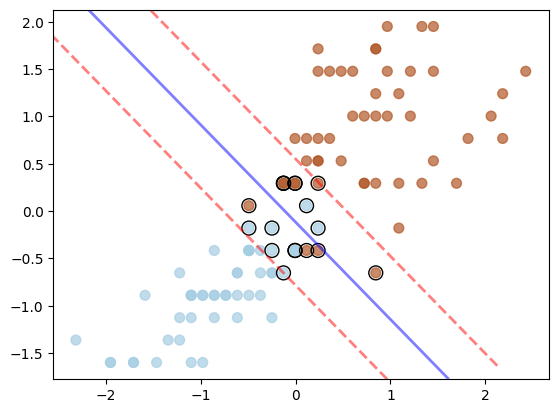

In [11]:
if __name__ == '__main__':
  cols = ['petal_length', 'petal_width']
  X, y = load_data(cols)
  y[y == 0] = -1
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = LinearSVMUsingSoftMargin()
  model.fit(X, y)
  print('train score: ', model.score(X, y))
  model.plot_decision_boundary()